In [1]:
# imports
import pandas as pd
import numpy as np
import os

# Data Munging

In [2]:
#  set the path of the raw data
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
# read the data with all default parameters
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [4]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [5]:
df = pd.concat((train_df, test_df), axis=0)

In [6]:
# use info to detect missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Feature: Embarked

In [7]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [8]:
df.Embarked.isnull()

PassengerId
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Embarked, Length: 1309, dtype: bool

In [9]:
# how many people embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [11]:
# impute the missing value with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [12]:
# option 2: explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [13]:
# replace the missing value with 'C'
df.Embarked.fillna('C', inplace=True)

In [14]:
# check if any value remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [15]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature: Fare

In [16]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [17]:
median_fare = df.loc[(df.Pclass==3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [18]:
df.Fare.fillna(median_fare, inplace=True)

In [19]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Feature: Age

In [20]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [21]:
# return null rows
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1274,NaN,NaN,S,14.5000,"Risien, Mrs. Samuel (Emma)",0,3,female,0,-888,364498


### option 1: replace all missing age with mean value

In [22]:
%matplotlib inline

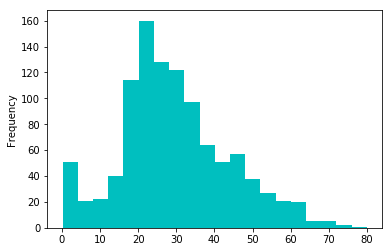

In [23]:
df.Age.plot(kind='hist', bins=20, color='c');

In [24]:
# get mean
df.Age.mean()

29.881137667304014

### issue: due to few high values of 70's and 80's pushing the overall mean

In [25]:
# replace the missing values 
# df.Age.fillna(df.Age.mean(), inplace=True)

### option 2: replace with median age of gender

In [26]:
# median values
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

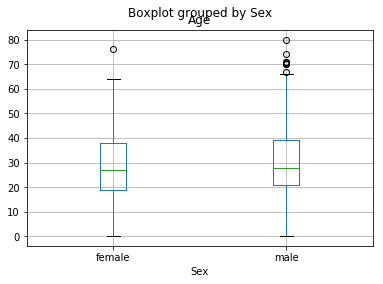

In [27]:
# visualize using box plot
df[df.Age.notnull()].boxplot('Age', 'Sex');

In [28]:
# replace :
# age_sex_median = df.groupby('Sex').Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

### option 3: replace with median age of Pclass

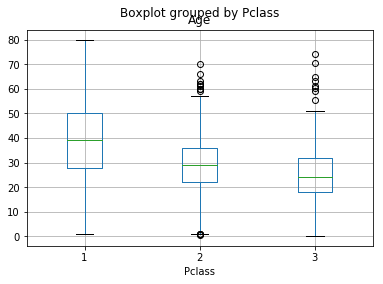

In [29]:
df[df.Age.notnull()].boxplot('Age', 'Pclass')

In [30]:
# replace :
# pclass_age_median = df.groupby('Pclass').Age.transform('median')
# df.Age.fillna(pclass_age_median, inplace=True)

### option 4: replace with median age title 

In [31]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1304                       Henriksson, Miss. Jenny Lovisa
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [32]:
# function to extract the title from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [33]:
# use map function to apply the function on each Name value row i
df.Name.map(lambda x: GetTitle(x)) # alternatively you can use : df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
6           mr
7           mr
         ...  
1303       mrs
1304      miss
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [34]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [35]:
# function to extract the title from the name
def GetTitle(name):
    title_group = {'mr' : 'Mr',
                   'mrs' : 'Mrs',
                   'miss' : 'Miss',
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme' : 'Mrs',
                   'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady'  : 'Lady',
                    'sir' : 'Sir',
                    'mlle': 'Miss',
                    'col' :'Officer',
                     'capt' :'Officer',
                     'the countess' : 'Lady',
                     'jonkheer' : 'Sir',
                     'dona' : 'Lady'}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [36]:
# create title feature
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [37]:
# head
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


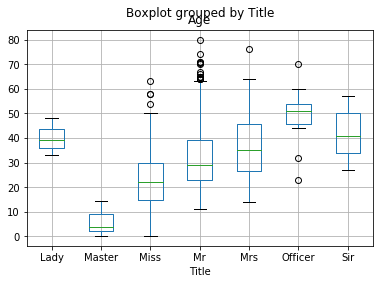

In [38]:
# box plot of Age with title
df[df.Age.notnull()].boxplot('Age', 'Title');

In [39]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [40]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


## Working with outliers

### Age

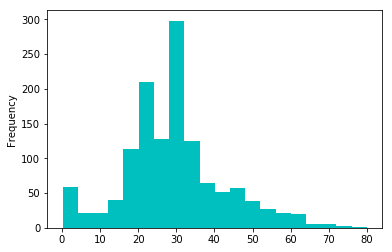

In [41]:
# use histogram to get understand the distribution
df.Age.plot(kind='hist', bins=20, color='c');

In [42]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


### Fare

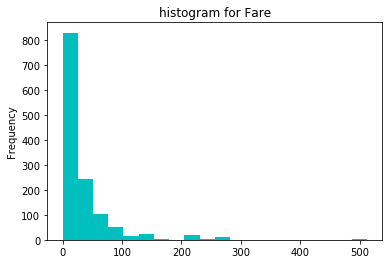

In [43]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

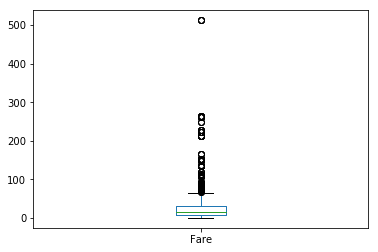

In [44]:
# box plot to identify outliers
df.Fare.plot(kind='box');

In [45]:
# look into the outliers
df.loc[df.Fare==df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [46]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomdate zero fares: log(0) is not defined

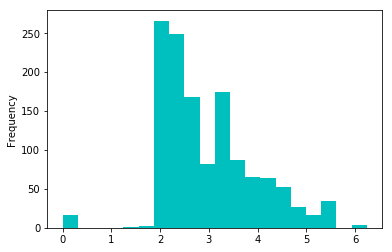

In [47]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

In [48]:
# binning
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
6         (7.896, 14.454]
7       (31.275, 512.329]
              ...        
1303    (31.275, 512.329]
1304      (-0.001, 7.896]
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [49]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']) # discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
6             low
7       very_high
          ...    
1303    very_high
1304     very_low
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [high < low < very_high < very_low]

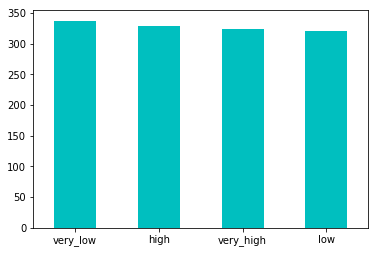

In [50]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [51]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

# Feature Engineering

## Feature: Age State (Adult or Child)

In [52]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [53]:
# AgeState counts
df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [54]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


## Feature: Family Size

In [55]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp +1 # 1 for self

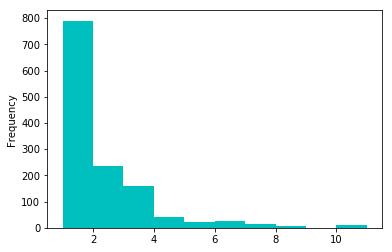

In [56]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='c');

In [57]:
# further explore this family with max family member
df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11


In [58]:
# further explore this family with max family member
df.loc[df.FamilySize == df.FamilySize.max(), ['Name', 'Survived', 'FamilySize', 'Ticket']]

,Name,Survived,FamilySize,Ticket
PassengerId,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343
202,"Sage, Mr. Frederick",0,11,CA. 2343
325,"Sage, Mr. George John Jr",0,11,CA. 2343
793,"Sage, Miss. Stella Anna",0,11,CA. 2343
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343
1080,"Sage, Miss. Ada",-888,11,CA. 2343
1234,"Sage, Mr. John George",-888,11,CA. 2343


In [59]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


## Feature: IsMother

In [60]:
# a lady aged more than 18 who has Parch > 0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch >0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [61]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


## Deck

In [62]:
# explore Cabin values
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
6        NaN
7        E46
        ... 
1303     C78
1304     NaN
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [63]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [64]:
# look at the Cabin = T
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [65]:
# set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [66]:
# look at the unique values of Cabin again
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'C128', 'D37', 'B35',
       'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111', 'C92',
       'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20', 'B79',
       'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86', 'C70',
       'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19', 'D50',
       'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24', 'C90

In [67]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [68]:
# check counts
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [69]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [70]:
# info command
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 210.2+ KB


In [71]:
df.Deck

PassengerId
1       Z
2       C
3       Z
4       C
5       Z
6       Z
7       E
       ..
1303    C
1304    Z
1305    Z
1306    C
1307    Z
1308    Z
1309    Z
Name: Deck, Length: 1309, dtype: object

## Categorical Feature Encoding

In [72]:
# sex 
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [73]:
# column Deck, PClass, Title, AgeState
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])

In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1309 non-null float64
Cabin                 294 non-null object
Fare                  1309 non-null float64
Name                  1309 non-null object
Parch                 1309 non-null int64
Sex                   1309 non-null object
SibSp                 1309 non-null int64
Survived              1309 non-null int64
Ticket                1309 non-null object
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pcla

### Drop and Reorder Columns

In [75]:
# drop columns
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [76]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [77]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null uint8
Deck_B                1309 non-null uint8
Deck_C                1309 non-null uint8
Deck_D                1309 non-null uint8
Deck_E                1309 non-null uint8
Deck_F                1309 non-null uint8
Deck_G                1309 non-null uint8
Deck_Z                1309 non-null uint8
Pclass_1              1309 non-null uint8
Pclass_2              1309 non-null uint8
Pclass_3              1309 non-null uint8
Title_Lady            1309 non-null uint8
Title_Master          1309 non-null uint8
Title_Miss            1309 non-null uint8
Title_Mr              1309 non-null uint8
Title_M

In [78]:
df[['Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Fare_Bin_high', 'Fare_Bin_low', 'Fare_Bin_very_high', 'Fare_Bin_very_low', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeState_Adult', 'AgeState_Child']] = df[['Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Fare_Bin_high', 'Fare_Bin_low', 'Fare_Bin_very_high', 'Fare_Bin_very_low', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeState_Adult', 'AgeState_Child']].astype(float)

In [79]:
columns2 = []
for i, x in enumerate(columns):
    if i > 5:
        columns2.append(x)

In [80]:
print(columns2)

['Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Z', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Lady', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Sir', 'Fare_Bin_high', 'Fare_Bin_low', 'Fare_Bin_very_high', 'Fare_Bin_very_low', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'AgeState_Adult', 'AgeState_Child']


In [81]:
df[columns2] = df[columns2].astype(float)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1309 non-null int64
Age                   1309 non-null float64
Fare                  1309 non-null float64
FamilySize            1309 non-null int64
IsMother              1309 non-null int32
IsMale                1309 non-null int32
Deck_A                1309 non-null float64
Deck_B                1309 non-null float64
Deck_C                1309 non-null float64
Deck_D                1309 non-null float64
Deck_E                1309 non-null float64
Deck_F                1309 non-null float64
Deck_G                1309 non-null float64
Deck_Z                1309 non-null float64
Pclass_1              1309 non-null float64
Pclass_2              1309 non-null float64
Pclass_3              1309 non-null float64
Title_Lady            1309 non-null float64
Title_Master          1309 non-null float64
Title_Miss            1309 non-null float64
Title_Mr             

## Save Processed Dataset

In [83]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [ ]:
# train data 
df.loc[df.Survived != -888].to_csv(write_train_path)
# test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived ==  -888, columns].to_csv(write_test_path)

### Advanced visualization using Matplotlib

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline 

(array([  80.,   62.,  324.,  426.,  189.,  108.,   66.,   41.,   10.,    3.]),
 array([  0.17 ,   8.153,  16.136,  24.119,  32.102,  40.085,  48.068,
         56.051,  64.034,  72.017,  80.   ]),
 <a list of 10 Patch objects>)

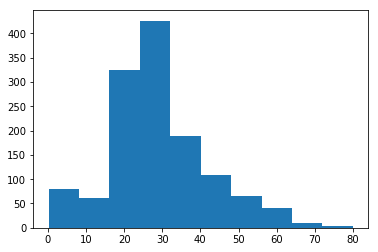

In [85]:
plt.hist(df.Age)

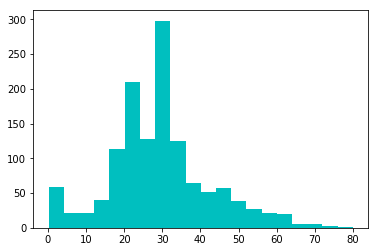

In [88]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

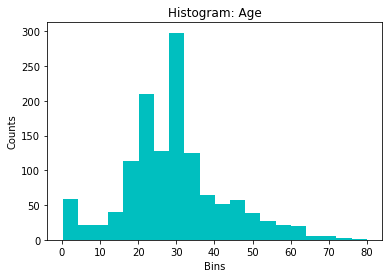

In [89]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram: Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

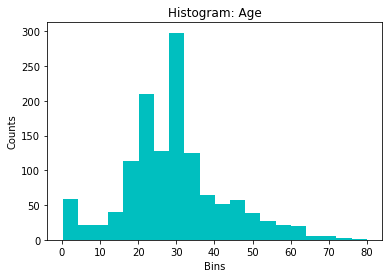

In [90]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram: Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

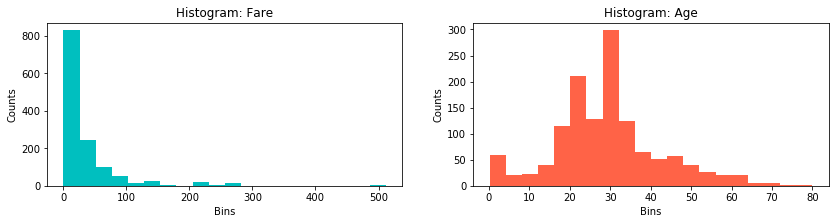

In [92]:
# add subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram: Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram: Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()



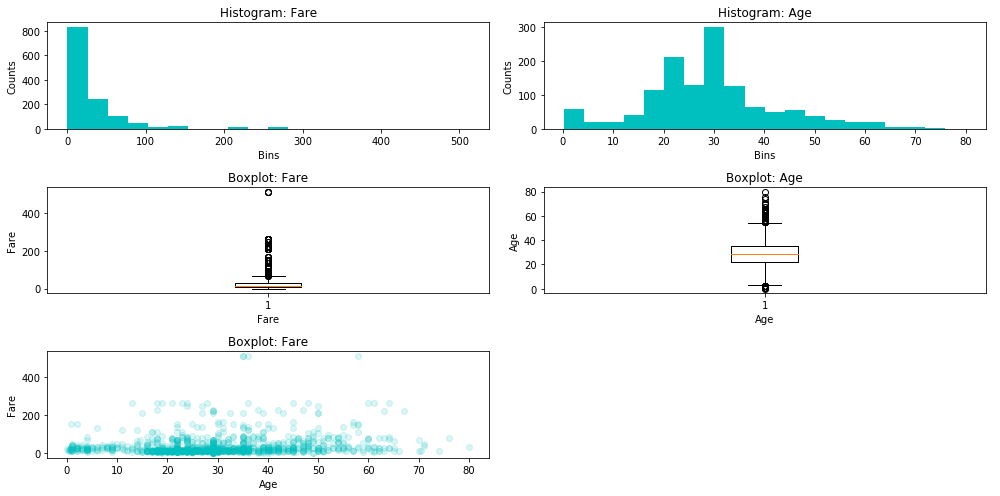

In [95]:
# Adding subplots
f, ax_arr = plt.subplots(3, 2, figsize=(14, 7))

# Plot 1
ax_arr[0, 0].hist(df.Fare, bins=20, color='c')
ax_arr[0, 0].set_title('Histogram: Fare')
ax_arr[0, 0].set_xlabel('Bins')
ax_arr[0, 0].set_ylabel('Counts')

# Plot 2
ax_arr[0, 1].hist(df.Age, bins=20, color='c')
ax_arr[0, 1].set_title('Histogram: Age')
ax_arr[0, 1].set_xlabel('Bins')
ax_arr[0, 1].set_ylabel('Counts')

# Plot 3
ax_arr[1, 0].boxplot(df.Fare.values)
ax_arr[1, 0].set_title('Boxplot: Fare')
ax_arr[1, 0].set_xlabel('Fare')
ax_arr[1, 0].set_ylabel('Fare')

# Plot 4
ax_arr[1, 1].boxplot(df.Age.values)
ax_arr[1, 1].set_title('Boxplot: Age')
ax_arr[1, 1].set_xlabel('Age')
ax_arr[1, 1].set_ylabel('Age')

# Plot 5
ax_arr[2, 0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2, 0].set_title('Boxplot: Fare')
ax_arr[2, 0].set_xlabel('Age')
ax_arr[2, 0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()

plt.show()

### Extra Visualization Material: For Practice

In [96]:
# family size
family_survived = pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived)
print(family_survived)

Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


In [99]:
# impact family size on survival rate
family_survived = df[df.Survived != -888].groupby(['FamilySize', 'Survived']).size().unstack()
print(family_survived)

Survived        0      1
FamilySize              
1           374.0  163.0
2            72.0   89.0
3            43.0   59.0
4             8.0   21.0
5            12.0    3.0
6            19.0    3.0
7             8.0    4.0
8             6.0    NaN
11            7.0    NaN


In [100]:
family_survived.columns = ['Not Survived', 'Survived']

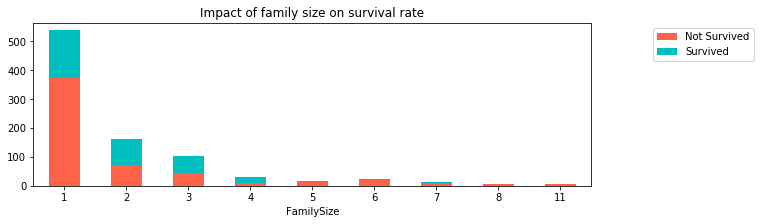

In [102]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['tomato', 'c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [105]:
family_survived.sum(axis=1)

FamilySize
1     537.0
2     161.0
3     102.0
4      29.0
5      15.0
6      22.0
7      12.0
8       6.0
11      7.0
dtype: float64

In [106]:
scalled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0)

In [107]:
scalled_family_survived.columns = ['Not Survived', 'Survived']